In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
#/content/sample_data/forestfires.csv

Predict the Burned area of forest with Neural Network

In [3]:
df = pd.read_csv('/content/sample_data/forestfires.csv')

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [5]:
df.drop(["month","day"],axis=1,inplace = True)

In [6]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:

df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


**Outlier Check**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


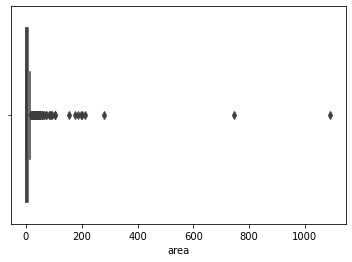

In [10]:
ax = sns.boxplot(df['area'])

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


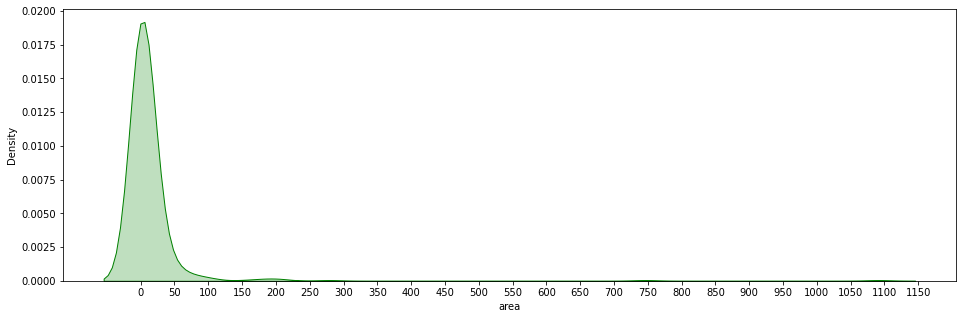

In [23]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()


The Data is highly postively skewed and has large kurtosis value
Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [24]:
#Building Neural Network

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df['size_category']=le.fit_transform(df['size_category'])

In [28]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
df.shape

(517, 29)

In [34]:
X = np.array(df.iloc[:,0:28])
Y = np.array(df.iloc[:,28])

In [36]:
X_norm = norm_func(X)

In [64]:
def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim=28, activation='relu',))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [70]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_norm,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.865, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.777, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.757, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.699, total=   1.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   2.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   3.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   2.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.961, total=   3.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.961, total=   3.1s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   4.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.962, total=   5.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.971, total=   6.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.932, total=   4.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.981, total=   5.7s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   0.9s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


In [71]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864077687263488, using {'batch_size': 40, 'epochs': 100}
0.8196788668632508,0.10478719188470358 with: {'batch_size': 10, 'epochs': 10}
0.9806012034416198,0.016257012007261634 with: {'batch_size': 10, 'epochs': 50}
0.9690067172050476,0.022452028728160794 with: {'batch_size': 10, 'epochs': 100}
0.7927184462547302,0.12500919586838663 with: {'batch_size': 20, 'epochs': 10}
0.9729462146759034,0.02307260566452644 with: {'batch_size': 20, 'epochs': 50}
0.978659451007843,0.0233103416742172 with: {'batch_size': 20, 'epochs': 100}
0.7344660282135009,0.1511541595468813 with: {'batch_size': 40, 'epochs': 10}
0.963181471824646,0.024861122491695094 with: {'batch_size': 40, 'epochs': 50}
0.9864077687263488,0.011650486787163626 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,Y, test_size=0.2)

In [79]:
final_model=create_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [80]:
final_model.fit(x_train, y_train, epochs=100, batch_size=40)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7409
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.7409
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7409
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7409
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7409
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7409
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7409
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7409
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7409
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7409
Epoch 11/

In [82]:
loss, accuracy = final_model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.992736
Loss: 0.047699


In [84]:
loss, accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.990385
Loss: 0.037122
